In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import limpieza
import outliers
import analisis_bi_multi
import var_selection
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from scipy.stats import uniform, randint
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

(CVXPY) Jun 19 06:09:20 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')
(CVXPY) Jun 19 06:09:20 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')
(CVXPY) Jun 19 06:09:20 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')


In [2]:
file_path_train = r'D:\Documentos\projects\train_bank.csv'
file_path_test = r'D:\Documentos\projects\test_bank.csv'


df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

In [3]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [4]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [5]:
df_train= df_train.drop(columns=['id','CustomerId','Surname'])
df_test= df_test.drop(columns=['id','CustomerId','Surname'])

In [6]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [7]:
df_train[(df_train['Balance'] == 0) & (df_train['Exited'] == 0)].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,75156.000000,75156.000000,75156.000000,75156.0,75156.000000,75156.000000,75156.000000,75156.000000,75156.0
mean,656.984925,36.341002,5.070241,0.0,1.817899,0.766366,0.546224,111839.422702,0.0
std,78.539729,8.000223,2.778952,0.0,0.395635,0.423145,0.497862,50428.057738,0.0
min,350.000000,18.000000,0.000000,0.0,1.000000,0.000000,0.000000,90.070000,0.0
25%,599.000000,31.000000,3.000000,0.0,2.000000,1.000000,0.000000,74423.127500,0.0
50%,662.000000,35.000000,5.000000,0.0,2.000000,1.000000,1.000000,117431.100000,0.0
75%,710.000000,40.000000,7.000000,0.0,2.000000,1.000000,1.000000,153356.800000,0.0
max,850.000000,92.000000,10.000000,0.0,4.000000,1.000000,1.000000,199992.480000,0.0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 13.9+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  object 
 2   Gender           110023 non-null  object 
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 8.4+ MB


In [10]:
df_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
df_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [12]:
def type(df,column,types):
    df[column]= df[column].astype(types)
    return

In [13]:
type(df_train,'Age','int64')
type(df_test,'Age','int64')

type(df_train,'HasCrCard','uint8')
type(df_test,'HasCrCard','uint8')

type(df_train,'IsActiveMember','uint8')
type(df_test,'IsActiveMember','uint8')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  uint8  
 8   IsActiveMember   165034 non-null  uint8  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(5), object(2), uint8(2)
memory usage: 11.6+ MB


In [15]:
limpieza.nan(df_train),limpieza.nan(df_test)

(CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64,
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 dtype: int64)

In [16]:
limpieza.shapiro(df_train), limpieza.ks(df_train)

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


({'CreditScore': (0.9962234497070312, 0.0),
  'Age': (0.9507551193237305, 0.0),
  'Tenure': (0.9501748085021973, 0.0),
  'Balance': (0.7539149522781372, 0.0),
  'NumOfProducts': (0.694777250289917, 0.0),
  'EstimatedSalary': (0.9672561883926392, 0.0),
  'Exited': (0.502591609954834, 0.0)},
 {'CreditScore': (1.0, 0.0),
  'Age': (1.0, 0.0),
  'Tenure': (0.8453558340951816, 0.0),
  'Balance': (0.5, 0.0),
  'NumOfProducts': (0.8413447460685429, 0.0),
  'EstimatedSalary': (1.0, 0.0),
  'Exited': (0.5, 0.0)})

In [17]:
limpieza.shapiro(df_test), limpieza.ks(df_test)

({'CreditScore': (0.996322512626648, 1.964200057444096e-41),
  'Age': (0.9505649209022522, 0.0),
  'Tenure': (0.9499167203903198, 0.0),
  'Balance': (0.7530813217163086, 0.0),
  'NumOfProducts': (0.6910748481750488, 0.0),
  'EstimatedSalary': (0.9675028920173645, 0.0)},
 {'CreditScore': (1.0, 0.0),
  'Age': (1.0, 0.0),
  'Tenure': (0.8454501534466927, 0.0),
  'Balance': (0.5, 0.0),
  'NumOfProducts': (0.8413447460685429, 0.0),
  'EstimatedSalary': (1.0, 0.0)})

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

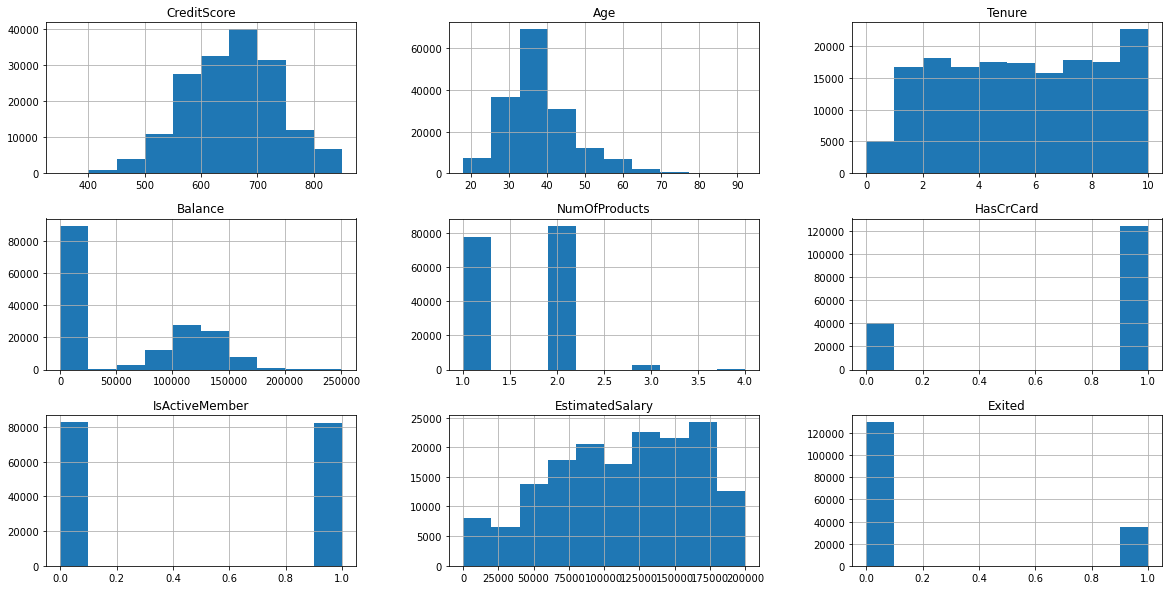

In [18]:
df_train.hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>, <AxesSubplot:>]],
      dtype=object)

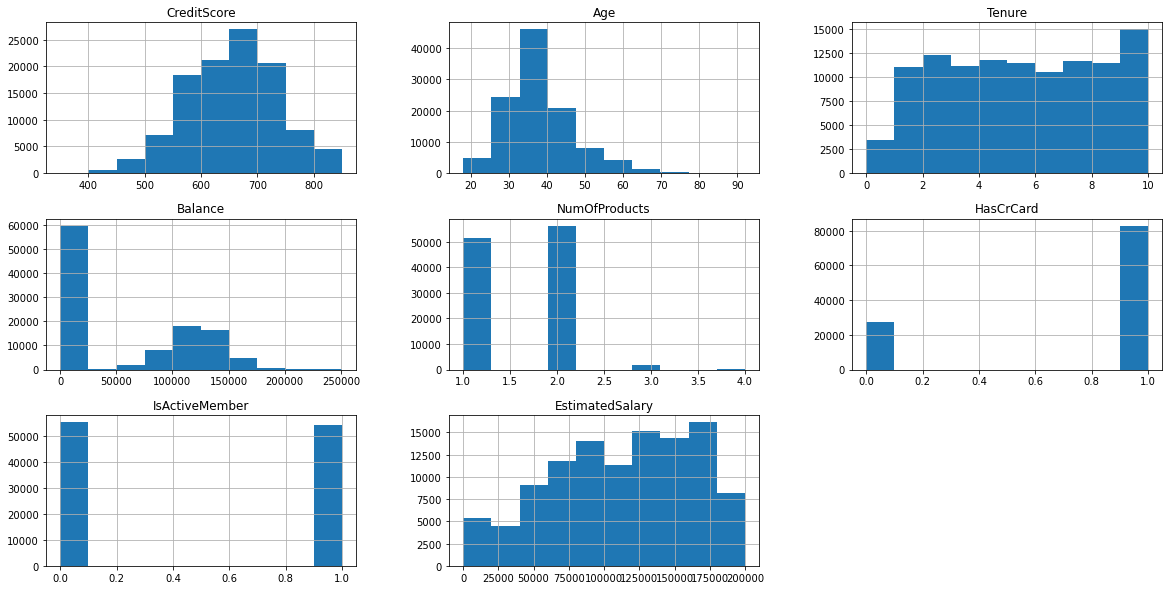

In [19]:
df_test.hist(figsize=(20,10))

<AxesSubplot:>

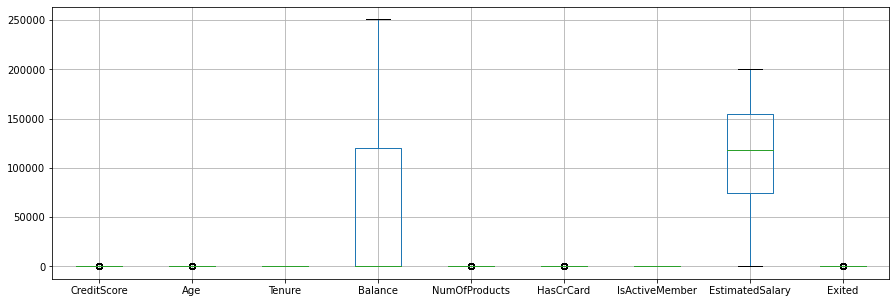

In [20]:
df_train.boxplot(figsize=(15,5))

<AxesSubplot:>

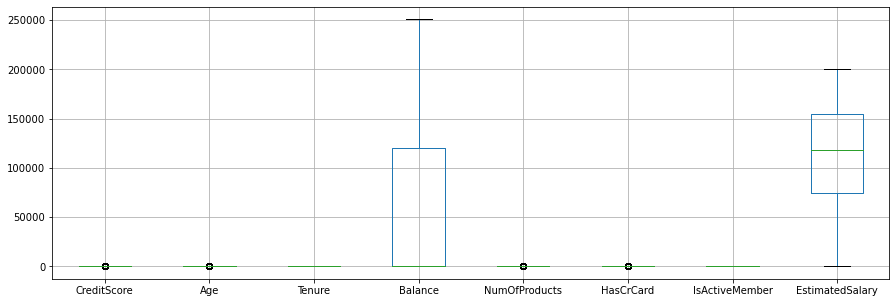

In [21]:
df_test.boxplot(figsize=(15,5))

In [22]:
def graf_func(df,column):
    column= df[column]
    plot = sns.JointGrid(data=df, x=column)
    plot.plot_joint(sns.histplot)
    plot.plot_marginals(sns.boxplot)
    return plot

(<seaborn.axisgrid.JointGrid at 0x1eb9bec28b0>,
 <seaborn.axisgrid.JointGrid at 0x1eb9be765e0>)

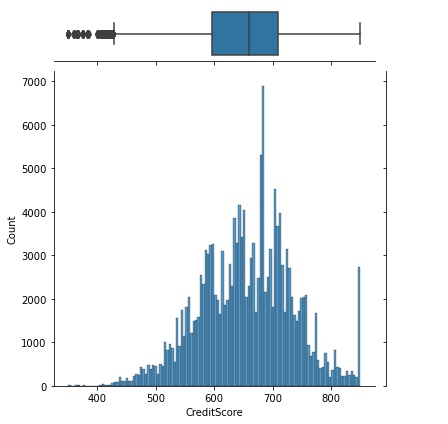

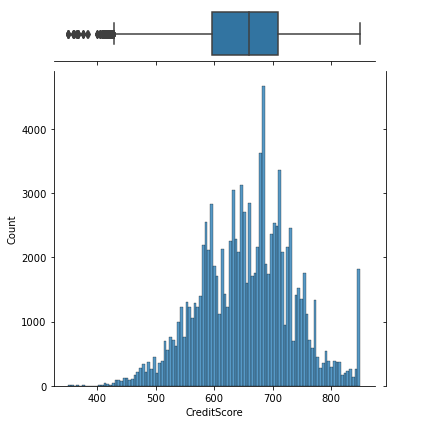

In [23]:
graf_func(df_train,'CreditScore'), graf_func(df_test,'CreditScore')

In [24]:
outliers.quantileoutlier(df_train,'CreditScore',1.5).max()

427

In [25]:
outliers.quantileoutlier(df_test,'CreditScore',1.5).max()

427

(<seaborn.axisgrid.JointGrid at 0x1eb9f89a460>,
 <seaborn.axisgrid.JointGrid at 0x1eb9ca2a610>)

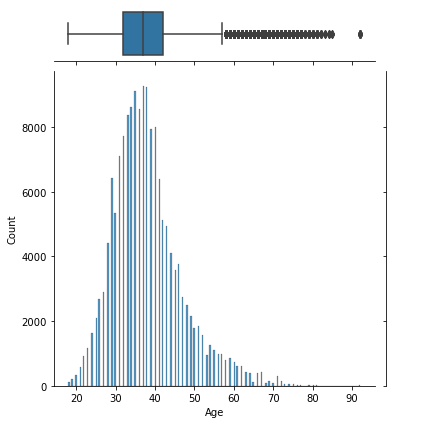

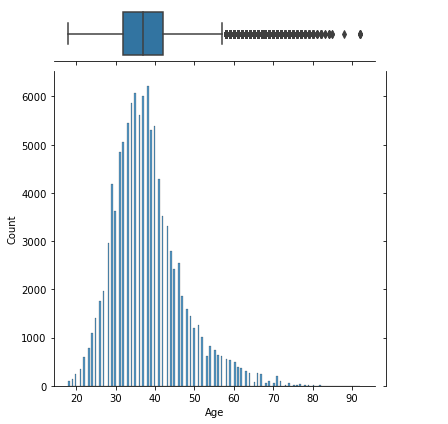

In [26]:
graf_func(df_train,'Age'), graf_func(df_test,'Age')

In [27]:
outliers.quantileoutlier(df_train,'Age',1.5).min()

58

In [28]:
outliers.quantileoutlier(df_test,'Age',1.5).min()

58

(<seaborn.axisgrid.JointGrid at 0x1eb9e5b28e0>,
 <seaborn.axisgrid.JointGrid at 0x1eb9e678670>)

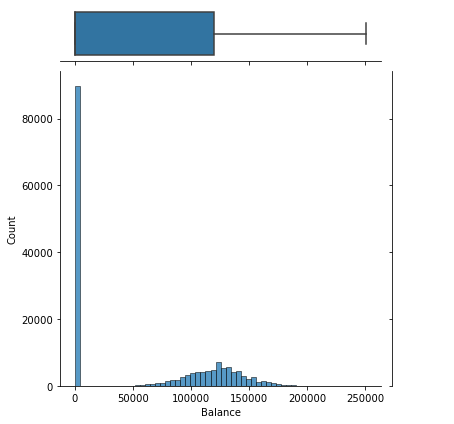

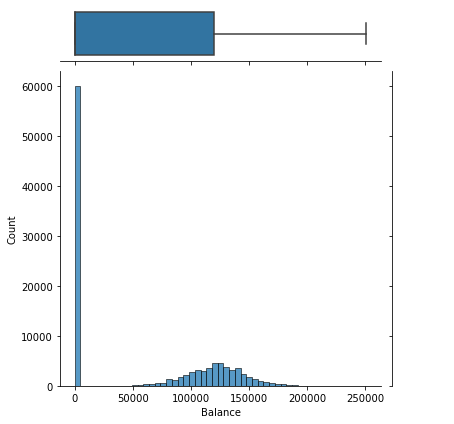

In [29]:
graf_func(df_train,'Balance'), graf_func(df_test,'Balance')

In [30]:
outliers.quantileoutlier(df_train,'Balance',1.5)

Series([], Name: Balance, dtype: float64)

In [31]:
outliers.quantileoutlier(df_test,'Balance',1.5)

Series([], Name: Balance, dtype: float64)

(<seaborn.axisgrid.JointGrid at 0x1eb9e8c9a90>,
 <seaborn.axisgrid.JointGrid at 0x1eb9e89b6a0>)

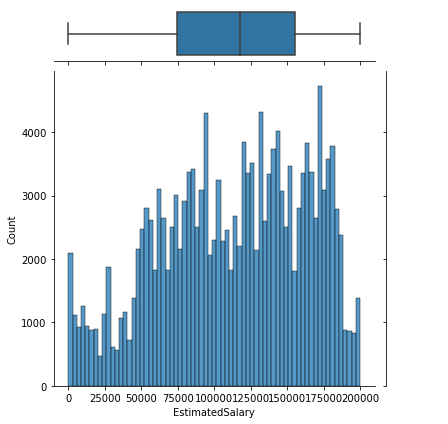

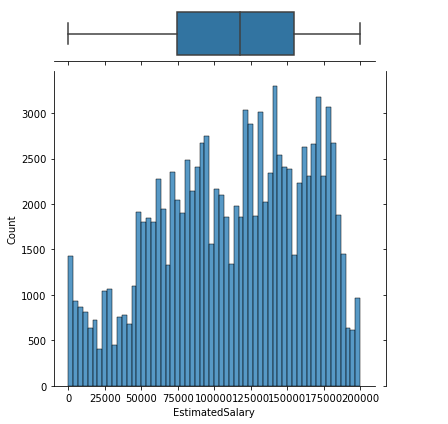

In [32]:
graf_func(df_train,'EstimatedSalary'), graf_func(df_test,'EstimatedSalary')

In [33]:
outliers.quantileoutlier(df_train,'EstimatedSalary',1.5)

Series([], Name: EstimatedSalary, dtype: float64)

In [34]:
outliers.quantileoutlier(df_test,'EstimatedSalary',1.5)

Series([], Name: EstimatedSalary, dtype: float64)

In [35]:
df_isolation= outliers.isolation(df_train,0.1)

D:\Anaconda\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [36]:
df_isolation.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000,148530.000000
mean,656.318198,37.332451,5.038416,52660.068366,1.544961,0.795328,0.496385,113569.397607,0.154952
std,76.298493,7.991340,2.750676,61941.441021,0.503195,0.403463,0.499989,48915.728972,0.361860
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,599.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,76821.240000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,119333.300000,0.000000
75%,709.000000,41.000000,7.000000,117559.050000,2.000000,1.000000,1.000000,153955.380000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<AxesSubplot:>

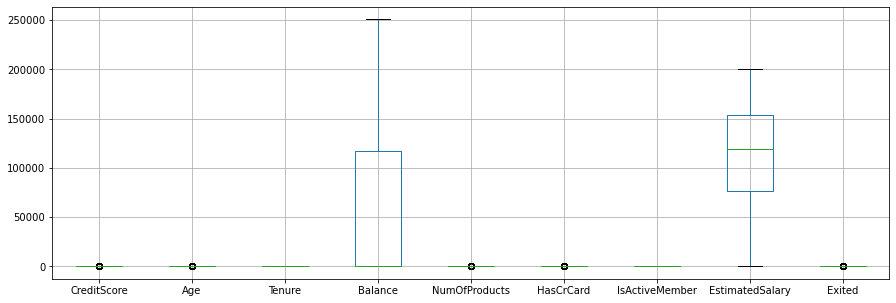

In [37]:
df_isolation.boxplot(figsize=(15,5))

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

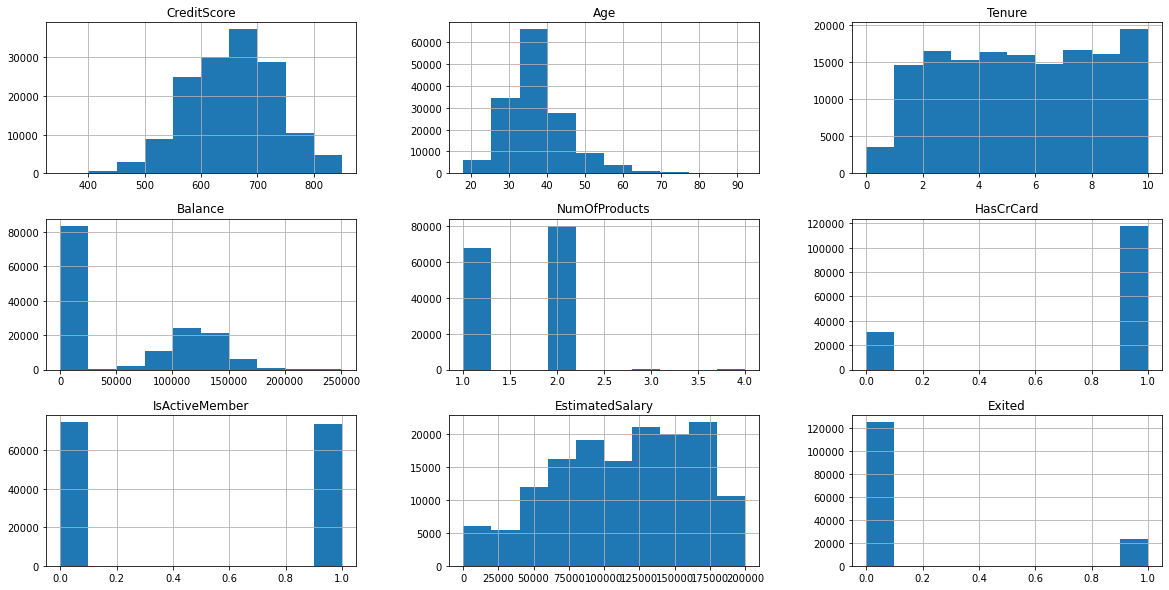

In [38]:
df_isolation.hist(figsize=(20,10))

In [39]:
df_knn= outliers.knn_outliers(df_train,0.1)

In [40]:
df_knn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,152370.000000,152370.000000,152370.000000,152370.000000,152370.000000,152370.00000,152370.000000,152370.000000,152370.000000
mean,656.360858,38.086894,5.021067,50093.694145,1.573105,0.75488,0.497545,113774.744753,0.208742
std,79.733850,8.843680,2.802904,61330.845002,0.544065,0.43016,0.499996,49426.267554,0.406411
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.00000,0.000000,76615.380000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.00000,0.000000,120107.100000,0.000000
75%,710.000000,42.000000,7.000000,117020.080000,2.000000,1.00000,1.000000,155853.955000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:>

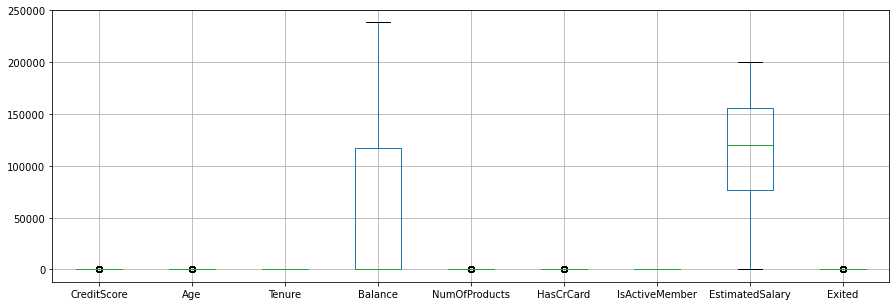

In [41]:
df_knn.boxplot(figsize=(15,5))

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

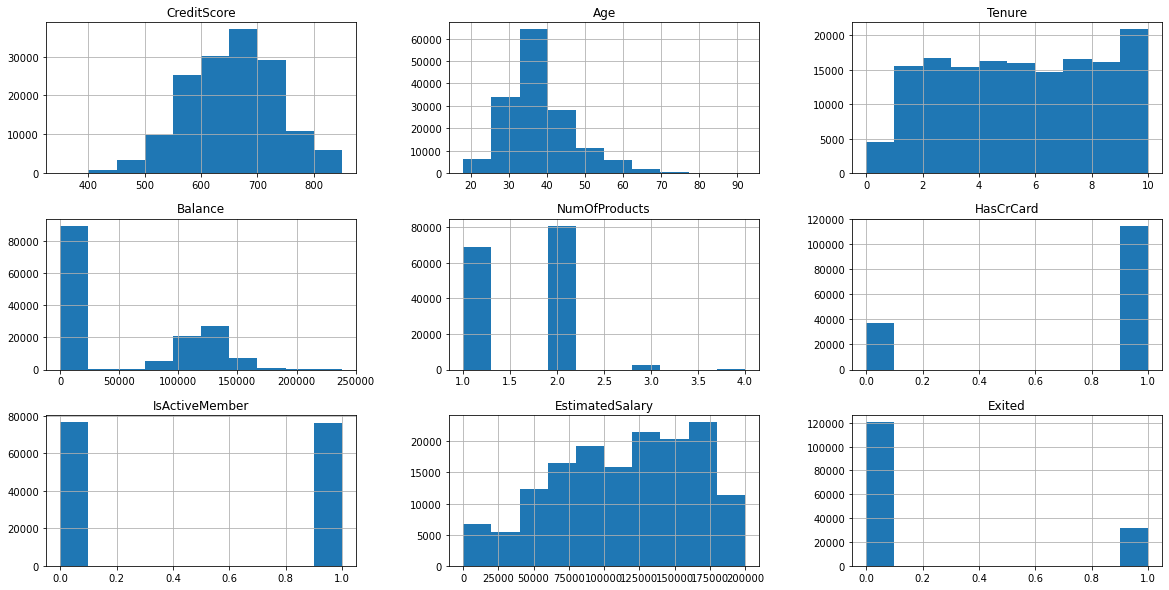

In [42]:
df_knn.hist(figsize=(20,10))

In [43]:
df_train= df_train[df_train['Age']<58].reset_index(drop=True)
df_test= df_test[df_test['Age']<58].reset_index(drop=True)

In [44]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
158635,667,Spain,Female,33,2,0.00,1,1,1,131834.75,0
158636,792,France,Male,35,3,0.00,1,0,0,131834.45,0
158637,565,France,Male,31,5,0.00,1,1,1,127429.56,0
158638,554,Spain,Female,30,7,161533.00,1,0,1,71173.03,0


In [45]:
df_train= df_train[df_train['CreditScore']>427].reset_index(drop=True)
df_test= df_test[df_test['CreditScore']>427].reset_index(drop=True)

In [46]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
158395,667,Spain,Female,33,2,0.00,1,1,1,131834.75,0
158396,792,France,Male,35,3,0.00,1,0,0,131834.45,0
158397,565,France,Male,31,5,0.00,1,1,1,127429.56,0
158398,554,Spain,Female,30,7,161533.00,1,0,1,71173.03,0


In [47]:
df_train['Exited'].value_counts(normalize=True)

0    0.79536
1    0.20464
Name: Exited, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='count'>

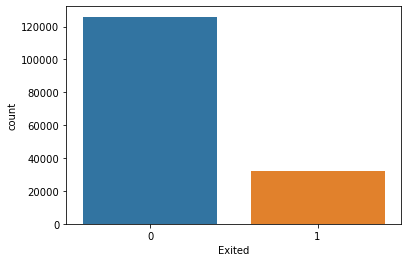

In [48]:
sns.countplot(x=df_train['Exited'])

[<AxesSubplot:ylabel='Geography'>, <AxesSubplot:ylabel='Gender'>]

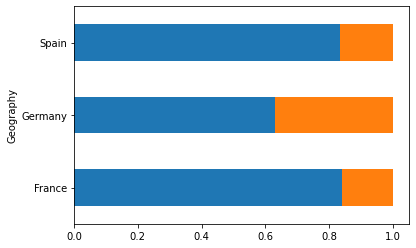

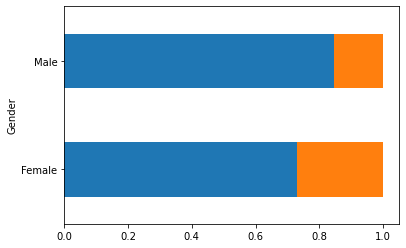

In [49]:
analisis_bi_multi.contingency(df_train,df_train['Exited'])

In [50]:
df_train['Geography'].value_counts()

France     90658
Spain      34721
Germany    33021
Name: Geography, dtype: int64

In [51]:
df_train['Gender'].value_counts()

Male      89662
Female    68738
Name: Gender, dtype: int64

In [52]:
df_train= limpieza.categorize(df_train)
df_test= limpieza.categorize(df_test)

In [53]:
df_train['Geography'].value_counts()

0    90658
1    34721
2    33021
Name: Geography, dtype: int64

In [54]:
df_train['Gender'].value_counts()

0    89662
1    68738
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender'>

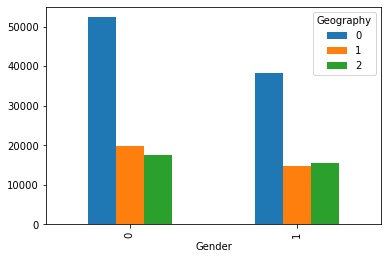

In [55]:
df_train.groupby(['Gender','Geography']).size().unstack().plot(kind='bar',stacked=False)

## Variable Selection

<AxesSubplot:>

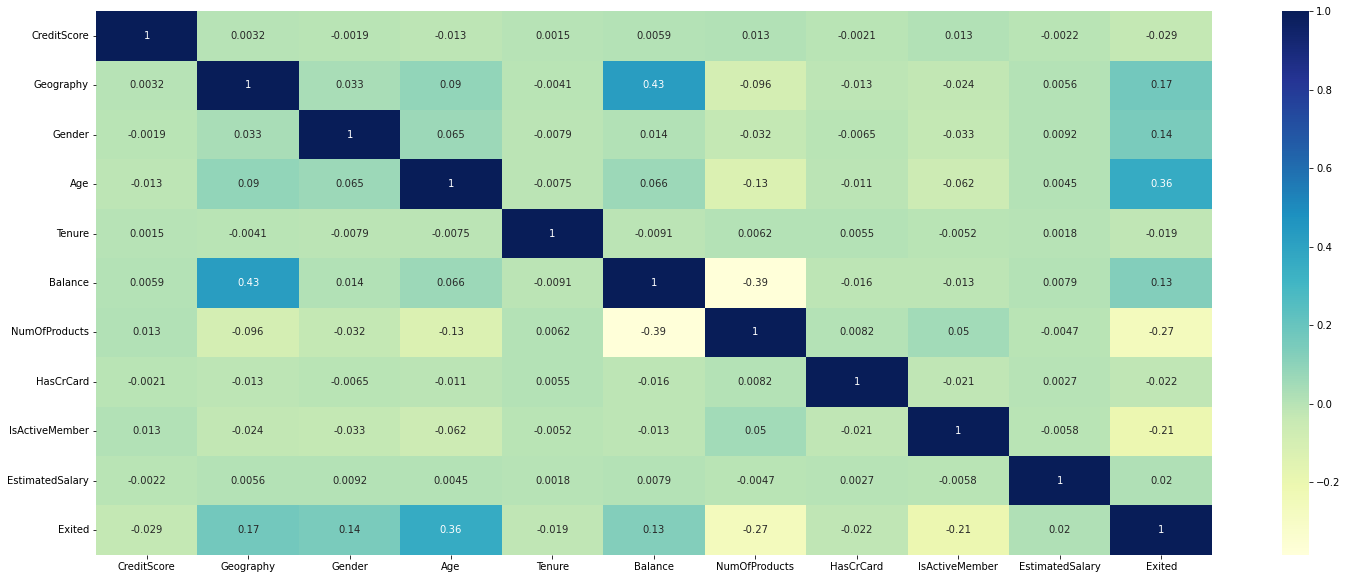

In [56]:
correlation= df_train.astype('int64').corr(method='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, annot=True, cmap= 'YlGnBu')

In [57]:
analisis_bi_multi.correlation(df_train,'Exited')

,Correlation,P-Value
CreditScore,-0.028786,2.123955e-30
Geography,0.169558,0.000000e+00
Gender,0.144936,0.000000e+00
Age,0.358363,0.000000e+00
Tenure,-0.018776,7.822586e-14
Balance,0.125292,0.000000e+00
NumOfProducts,-0.265255,0.000000e+00
HasCrCard,-0.021961,2.304875e-18
IsActiveMember,-0.206161,0.000000e+00
EstimatedSalary,0.019803,3.219586e-15


In [58]:
analisis_bi_multi.olstest(df_train,'Exited')

{'CreditScore': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F                      P>F  df constraint  df denom
 const    [[1221.49789153734]]  1.3564678311196269e-266              1  158398.0
 x      [[116.23463821088713]]    4.315160289737931e-27              1  158398.0,
 'Geography': <class 'statsmodels.stats.contrast.WaldTestResults'>
                            F  P>F  df constraint  df denom
 const  [[13147.80349315168]]  0.0              1  158398.0
 x      [[5636.621761107505]]  0.0              1  158398.0,
 'Gender': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F  P>F  df constraint  df denom
 const  [[13248.365497430186]]  0.0              1  158398.0
 x      [[3398.7529927403843]]  0.0              1  158398.0,
 'Age': <class 'statsmodels.stats.contrast.WaldTestResults'>
                             F  P>F  df constraint  df denom
 const  [[13813.161317156811]]  0.0              1  158398.0
 x      

In [59]:
analisis_bi_multi.varclus(df_train)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Geography,0.738246,0.029628,2.697458e-01
1,0,Balance,0.738246,0.133781,3.021796e-01
2,1,Age,0.689635,0.012621,3.143319e-01
3,1,Exited,0.689635,0.046081,3.253576e-01
4,2,EstimatedSalary,1.000000,0.000203,0.000000e+00
5,3,CreditScore,1.000000,0.000552,0.000000e+00
6,4,HasCrCard,1.000000,0.000452,0.000000e+00
7,5,Tenure,1.000000,0.000292,0.000000e+00
8,6,IsActiveMember,1.000000,0.025176,0.000000e+00
9,7,Gender,1.000000,0.016499,0.000000e+00


In [60]:
corr= stats.spearmanr(df_train[['Exited','Geography','Balance']])
corr[0][0]

array([1.        , 0.16955767, 0.12529184])

In [61]:
analisis_bi_multi.woenum(df_train,df_train['Exited'])

{'CreditScore':                      Bin   Count  Count (%)  Non-event  Event  Event rate  \
 0         (-inf, 560.50)   18611   0.117494      14195   4416    0.237279   
 1       [560.50, 659.50)   60571   0.382393      47629  12942    0.213667   
 2       [659.50, 709.50)   38740   0.244571      31593   7147    0.184486   
 3       [709.50, 730.50)   14101   0.089021      11602   2499    0.177221   
 4          [730.50, inf)   26377   0.166521      20966   5411    0.205141   
 5                Special       0   0.000000          0      0    0.000000   
 6                Missing       0   0.000000          0      0    0.000000   
 Totals                    158400   1.000000     125985  32415    0.204640   
 
              WoE        IV            JS  
 0      -0.189886  0.004474  5.584016e-04  
 1      -0.054578  0.001157  1.446581e-04  
 2       0.128701  0.003898  4.868565e-04  
 3       0.177745  0.002666  3.327543e-04  
 4      -0.003073  0.000002  1.967960e-07  
 5            0.0

In [62]:
analisis_bi_multi.woecat(df_train,df_train['Exited'])

{'Geography':             Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]   90658   0.572336      76204  14454    0.159434  0.304901   
 1           [1]   34721   0.219198      28958   5763    0.165980  0.256847   
 2           [2]   33021   0.208466      20823  12198    0.369401 -0.822755   
 3       Special       0   0.000000          0      0    0.000000       0.0   
 4       Missing       0   0.000000          0      0    0.000000       0.0   
 Totals           158400   1.000000     125985  32415    0.204640             
 
               IV        JS  
 0       0.048467  0.006035  
 1       0.013373  0.001667  
 2       0.173623  0.021111  
 3       0.000000  0.000000  
 4       0.000000  0.000000  
 Totals  0.235463  0.028813  ,
 'Gender':             Bin   Count  Count (%)  Non-event  Event  Event rate       WoE  \
 0           [0]   89662   0.566048      75904  13758    0.153443  0.350307   
 1           [1]   68738   0.433952      50081  18657

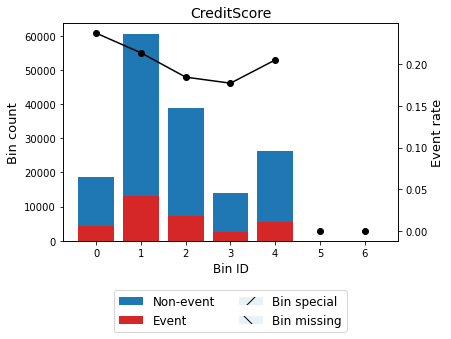

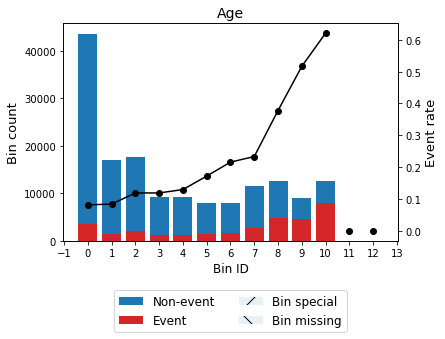

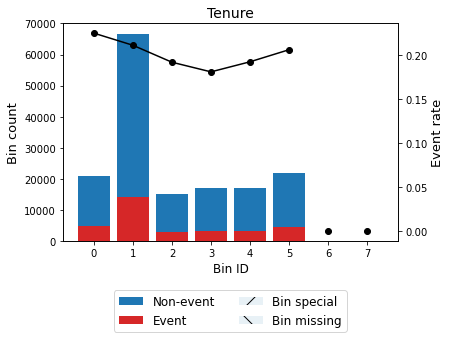

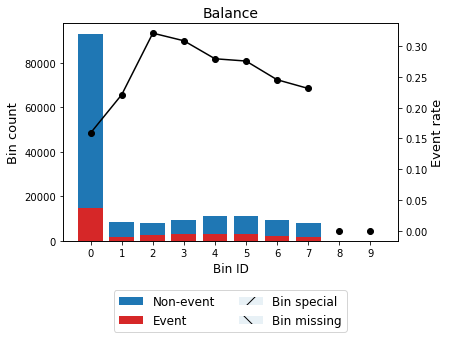

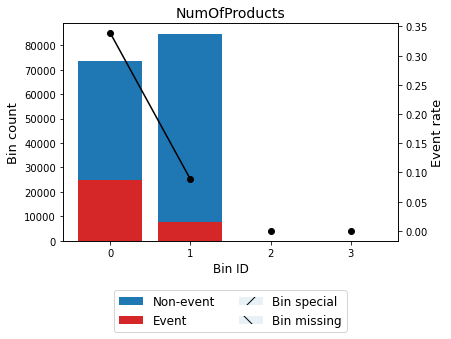

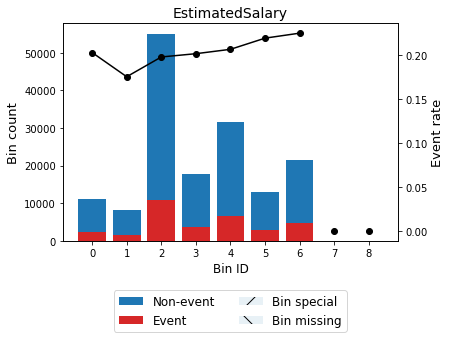

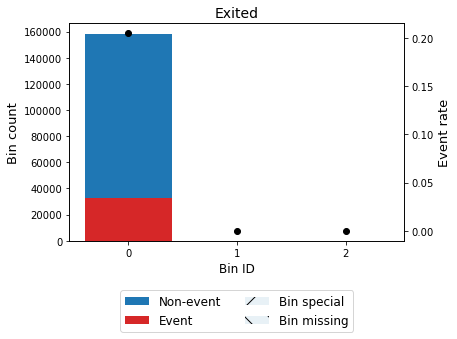

[None, None, None, None, None, None, None]

In [63]:
analisis_bi_multi.woegrafnum(df_train,df_train['Exited'])

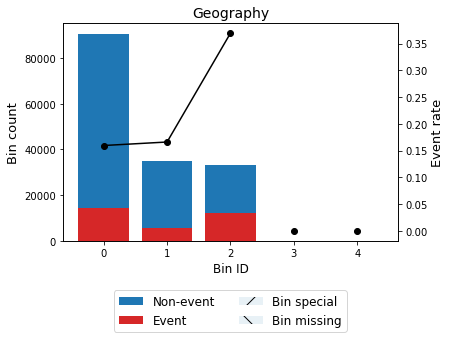

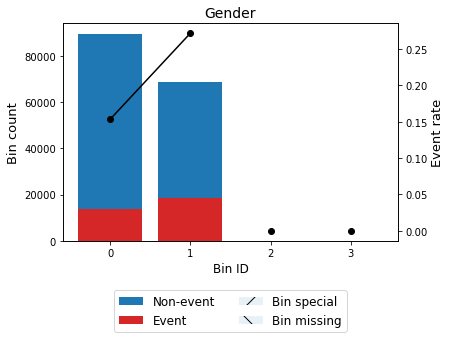

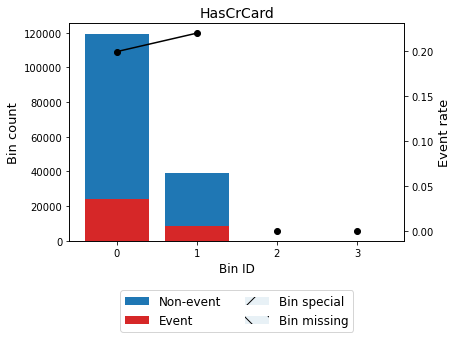

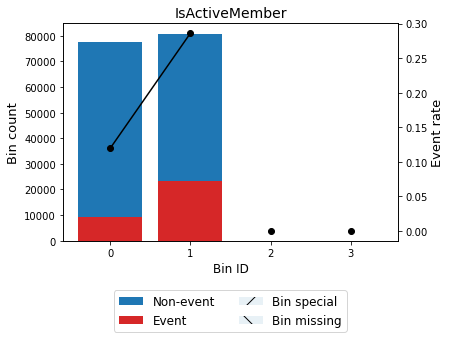

[None, None, None, None]

In [64]:
analisis_bi_multi.woegrafcat(df_train,df_train['Exited'])

In [65]:
columns_scale= ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

scaler = MinMaxScaler()
df_train[columns_scale]= scaler.fit_transform(df_train[columns_scale])
#df_test[columns_scale]= scaler.fit_transform(df_test[columns_scale])

In [66]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.568720,0,0,0.384615,0.3,0.000000,0.333333,1,0,0.907279,0
1,0.471564,0,0,0.384615,0.1,0.000000,0.333333,1,1,0.247483,0
2,0.592417,0,0,0.564103,1.0,0.000000,0.333333,1,0,0.924364,0
3,0.362559,0,0,0.410256,0.2,0.593398,0.000000,1,1,0.422787,0
4,0.682464,1,0,0.384615,0.5,0.000000,0.333333,1,1,0.075293,0
...,...,...,...,...,...,...,...,...,...,...,...
158395,0.566351,1,1,0.384615,0.2,0.000000,0.000000,1,1,0.659179,0
158396,0.862559,0,0,0.435897,0.3,0.000000,0.000000,0,0,0.659177,0
158397,0.324645,0,0,0.333333,0.5,0.000000,0.000000,1,1,0.637151,0
158398,0.298578,1,1,0.307692,0.7,0.643819,0.000000,0,1,0.355841,0


In [67]:
var_selection.randomforest(df_train,'Exited','log_loss')

Feature 0: 0.16661811352609796
Feature 1: 0.037271139101796046
Feature 2: 0.016865640867987346
Feature 3: 0.20658522269835056
Feature 4: 0.08135710180541991
Feature 5: 0.11868196522587386
Feature 6: 0.14298171458082976
Feature 7: 0.012600562421432598
Feature 8: 0.0374576277292848
Feature 9: 0.17958091204292717


In [68]:
var_selection.decisiontrees(df_train,'Exited')

Feature 0: 0.16241003447145055
Feature 1: 0.027280191292382176
Feature 2: 0.012022870477410531
Feature 3: 0.2063816597294965
Feature 4: 0.07597235168722347
Feature 5: 0.12904620596768807
Feature 6: 0.13818928606835285
Feature 7: 0.014857757727524772
Feature 8: 0.03326793215934146
Feature 9: 0.20057171041912963


In [69]:
var_selection.adaboost(df_train,'Exited')

Feature 0: 0.08
Feature 1: 0.04
Feature 2: 0.02
Feature 3: 0.44
Feature 4: 0.06
Feature 5: 0.16
Feature 6: 0.08
Feature 7: 0.02
Feature 8: 0.02
Feature 9: 0.08


In [70]:
var_selection.gradientboost(df_train,'Exited')

Feature 0: 0.0022572841906256355
Feature 1: 0.061397837107902344
Feature 2: 0.02780616705648696
Feature 3: 0.4147527699740183
Feature 4: 0.0007717304784362292
Feature 5: 0.04858063242628351
Feature 6: 0.3443210347473722
Feature 7: 0.001229863515852224
Feature 8: 0.097454901821757
Feature 9: 0.0014277786812655262


## Model development

#### What are the most important variables to predict the customer churn?

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, classification_report

In [72]:
df_train= df_train[['Geography','Gender','Age','NumOfProducts','IsActiveMember','Exited']]
df_test= df_test[['Geography','Gender','Age','NumOfProducts','IsActiveMember']].values

In [73]:
X= df_train.drop(columns=['Exited'])
y= df_train['Exited']

In [74]:
X

,Geography,Gender,Age,NumOfProducts,IsActiveMember
0,0,0,0.384615,0.333333,0
1,0,0,0.384615,0.333333,1
2,0,0,0.564103,0.333333,0
3,0,0,0.410256,0.000000,1
4,1,0,0.384615,0.333333,1
...,...,...,...,...,...
158395,1,1,0.384615,0.000000,1
158396,0,0,0.435897,0.000000,0
158397,0,0,0.333333,0.000000,1
158398,1,1,0.307692,0.000000,1


In [75]:
xtrain, xtest, ytrain, ytest= train_test_split(X,y,test_size=.30,random_state=0)

In [76]:
logistic= LogisticRegression(penalty='none',random_state=0)

cv_scores= cross_val_score(logistic,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

logistic.fit(xtrain,ytrain)

predict= logistic.predict(xtest)

print(classification_report(ytest,predict))

[0.84329906 0.84798882 0.84347944 0.84532828 0.84298341]
0.8446158008658008
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     37761
           1       0.70      0.40      0.51      9759

    accuracy                           0.84     47520
   macro avg       0.78      0.68      0.71     47520
weighted avg       0.83      0.84      0.82     47520



In [77]:
param_grid = {
    'penalty': ['none','l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga','elasticnet']
}

grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

print(grid_search.best_params_)
print(grid_search.best_score_)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\Anaconda\lib\site-p

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.8449044011544012


In [78]:
logistic= LogisticRegression(penalty='l2',C= 0.1, solver='saga',random_state=0)
logistic.fit(xtrain,ytrain)

predict= logistic.predict(xtest)

print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     37761
           1       0.70      0.40      0.51      9759

    accuracy                           0.84     47520
   macro avg       0.78      0.68      0.71     47520
weighted avg       0.83      0.84      0.82     47520



In [79]:
random_forest= RandomForestClassifier(random_state=0)

cv_scores= cross_val_score(random_forest,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

random_forest.fit(xtrain,ytrain)

y_predict= random_forest.predict(xtest)

print(classification_report(ytest,y_predict))

[0.8590368  0.86525974 0.86025433 0.86052489 0.86066017]
0.8611471861471862
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37761
           1       0.72      0.50      0.59      9759

    accuracy                           0.86     47520
   macro avg       0.80      0.72      0.75     47520
weighted avg       0.85      0.86      0.85     47520



In [80]:
param_grid= {'max_depth': range(1,5)}

grid_search = GridSearchCV(random_forest,param_grid, cv=5,scoring='accuracy')
grid_search.fit(xtrain,ytrain)
    
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 4}
0.8542748917748918


In [81]:
random_forest= RandomForestClassifier(max_depth=4, random_state=0)
random_forest.fit(xtrain,ytrain)

y_predict= random_forest.predict(xtest)

print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     37761
           1       0.76      0.40      0.52      9759

    accuracy                           0.85     47520
   macro avg       0.81      0.68      0.72     47520
weighted avg       0.84      0.85      0.83     47520



In [82]:
xgb= GradientBoostingClassifier(random_state=0)

cv_scores= cross_val_score(xgb,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

xgb.fit(xtrain,ytrain)

y_pred= xgb.predict(xtest)

print(classification_report(ytest,y_pred))

[0.85822511 0.86737915 0.86093074 0.86268939 0.86309524]
0.862463924963925
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37761
           1       0.73      0.50      0.60      9759

    accuracy                           0.86     47520
   macro avg       0.80      0.73      0.76     47520
weighted avg       0.85      0.86      0.85     47520



In [83]:
param_grid = {
    'max_depth': range(1,4),
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

{'learning_rate': 0.09, 'max_depth': 3}


In [84]:
xgb= GradientBoostingClassifier(random_state=0, learning_rate=0.09, max_depth=3)
xgb.fit(xtrain,ytrain)

y_pred= xgb.predict(xtest)

print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37761
           1       0.73      0.50      0.60      9759

    accuracy                           0.86     47520
   macro avg       0.80      0.73      0.76     47520
weighted avg       0.85      0.86      0.85     47520



In [85]:
dct= DecisionTreeClassifier(random_state=0)

cv_scores= cross_val_score(dct,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

dct.fit(xtrain,ytrain)

y_pred= dct.predict(xtest)

print(classification_report(ytest,y_pred))

[0.85912698 0.86426768 0.85930736 0.85989358 0.86007395]
0.8605339105339105
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37761
           1       0.73      0.49      0.59      9759

    accuracy                           0.86     47520
   macro avg       0.80      0.72      0.75     47520
weighted avg       0.85      0.86      0.85     47520



In [86]:
param_grid = {
    'max_depth': range(1,4),
    'criterion': ["gini", "entropy", "log_loss"]
}

grid_search = GridSearchCV(dct, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [87]:
dct= DecisionTreeClassifier(random_state=0,max_depth=3,criterion= 'gini')
dct.fit(xtrain,ytrain)

y_pred= dct.predict(xtest)

print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     37761
           1       0.78      0.39      0.52      9759

    accuracy                           0.85     47520
   macro avg       0.82      0.68      0.72     47520
weighted avg       0.84      0.85      0.83     47520



In [88]:
abc= AdaBoostClassifier(random_state=0)

cv_scores= cross_val_score(abc,xtrain,ytrain,cv=5)
print(cv_scores)
print(cv_scores.mean())

abc.fit(xtrain,ytrain)

y_pred= abc.predict(xtest)

print(classification_report(ytest,y_pred))

[0.85944264 0.86544012 0.86084055 0.86237374 0.86246392]
0.8621121933621932
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37761
           1       0.73      0.49      0.59      9759

    accuracy                           0.86     47520
   macro avg       0.81      0.72      0.75     47520
weighted avg       0.85      0.86      0.85     47520



In [89]:
param_grid = {
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
}

grid_search = GridSearchCV(abc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

{'learning_rate': 0.1}


In [90]:
abc= AdaBoostClassifier(random_state=0, learning_rate=0.1)
abc.fit(xtrain,ytrain)

y_pred= abc.predict(xtest)

print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     37761
           1       0.79      0.36      0.49      9759

    accuracy                           0.85     47520
   macro avg       0.82      0.67      0.70     47520
weighted avg       0.84      0.85      0.83     47520

